In [3]:
from google.colab import files
uploaded = files.upload()

Saving online_retail_II.xlsx to online_retail_II.xlsx


In [4]:
import pandas as pd

In [5]:
data=pd.read_excel('online_retail_II.xlsx')
df=pd.DataFrame(data)
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None


In [7]:
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [8]:
df=df.dropna(subset=['Description'])

In [9]:
product=df.copy()

In [10]:
df=df.dropna(subset=['Customer ID'])

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
df['year']=df['InvoiceDate'].dt.year

In [13]:
df['month']=df['InvoiceDate'].dt.month

In [14]:
df['date']=df['InvoiceDate'].dt.date

In [16]:
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  year  month  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  2009     12   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009     12   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009     12   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  2009     12   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  2009     12   

         date  
0  2009-12-01  
1  2009-12-01  
2  2009-12-01  
3  2009-12-01  
4  2009-12-01  


In [18]:
df['TotalPrice']=df['Quantity']*df['Price']

In [25]:
daily_sales=df.groupby('date')['TotalPrice'].sum()

In [26]:
import matplotlib.pyplot as plt

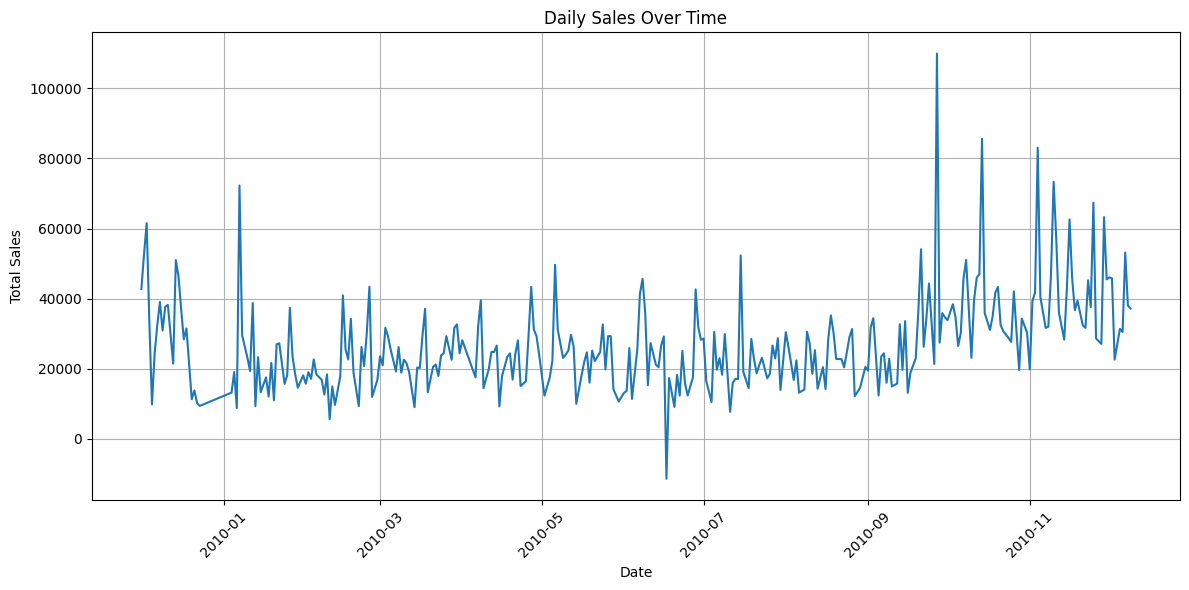

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)

plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
df['YearMonth']=df['InvoiceDate'].dt.year.astype(str)+'-'+df['InvoiceDate'].dt.month.astype(str).str.zfill(2)

In [35]:
monthly_sales=df.groupby('YearMonth')['TotalPrice'].sum()

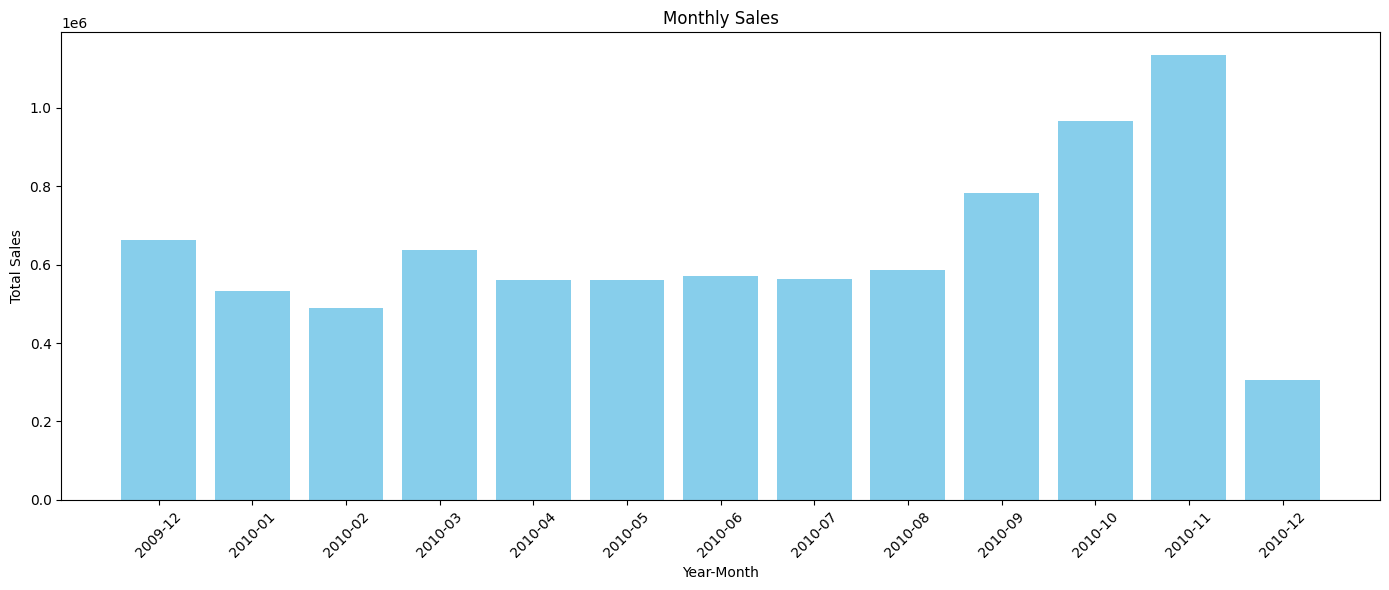

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.bar(monthly_sales.index, monthly_sales.values, color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:
top_products=df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

In [51]:
print(top_products)

Description
WHITE HANGING HEART T-LIGHT HOLDER    55861
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54274
BROCADE RING PURSE                    47430
PACK OF 72 RETRO SPOT CAKE CASES      44507
ASSORTED COLOUR BIRD ORNAMENT         44120
60 TEATIME FAIRY CAKE CASES           35630
PACK OF 60 PINK PAISLEY CAKE CASES    30888
JUMBO BAG RED RETROSPOT               29498
BLACK AND WHITE PAISLEY FLOWER MUG    25679
SMALL POPCORN HOLDER                  25394
Name: Quantity, dtype: int64


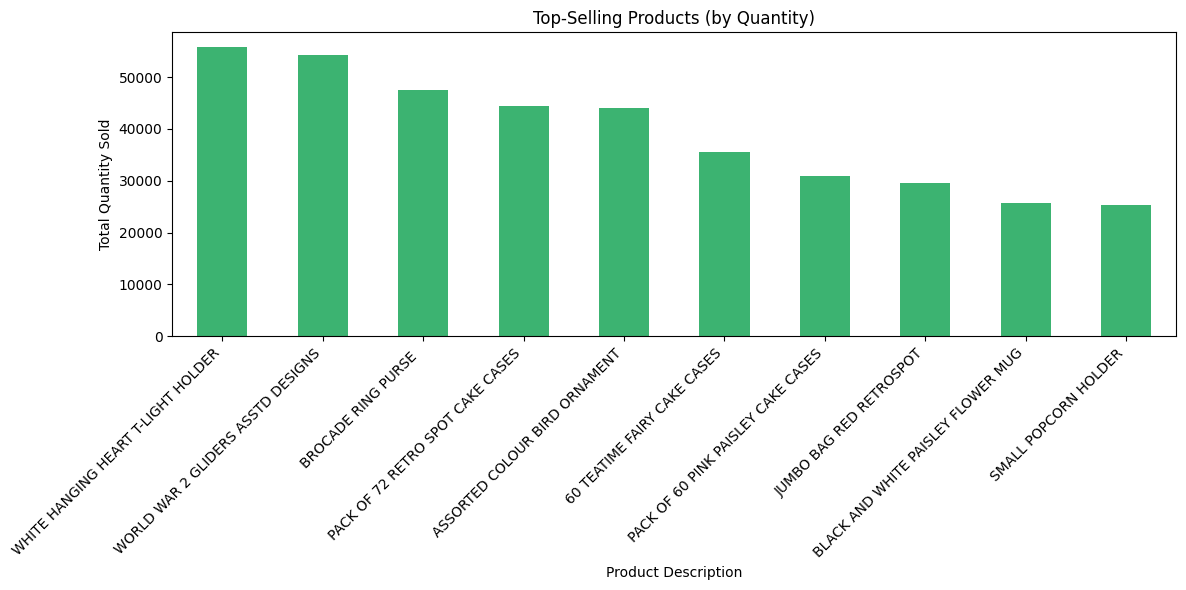

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
top_products.plot(kind='bar', color='mediumseagreen')
plt.title('Top-Selling Products (by Quantity)')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [58]:
top_revenue=df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

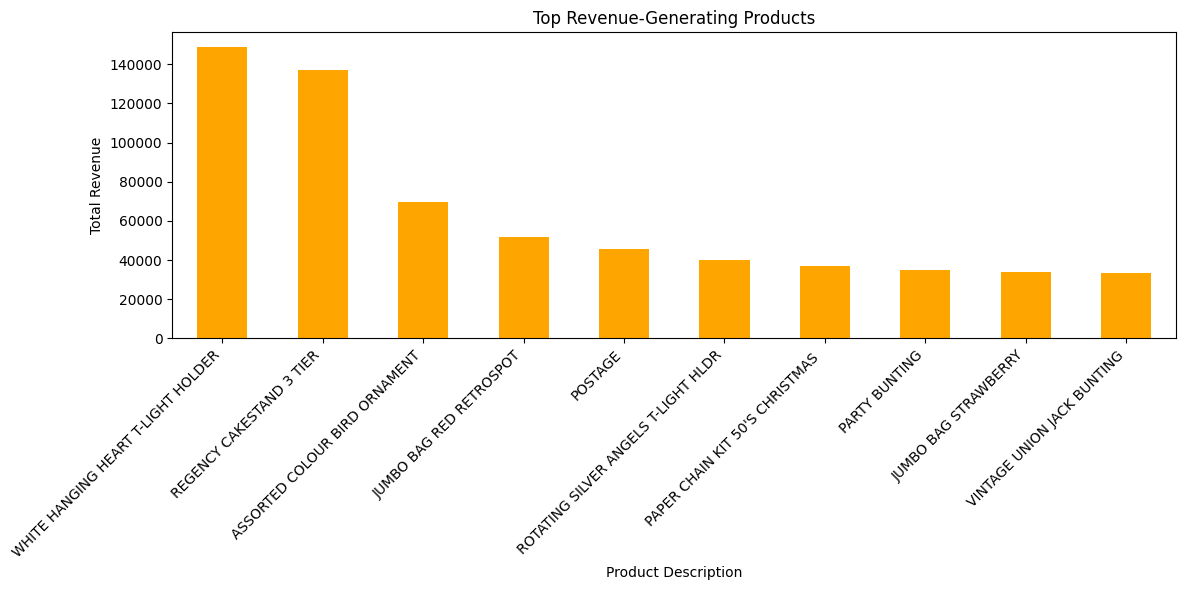

In [59]:
plt.figure(figsize=(12,6))
top_revenue.plot(kind='bar', color='orange')
plt.title('Top Revenue-Generating Products')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [61]:
top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

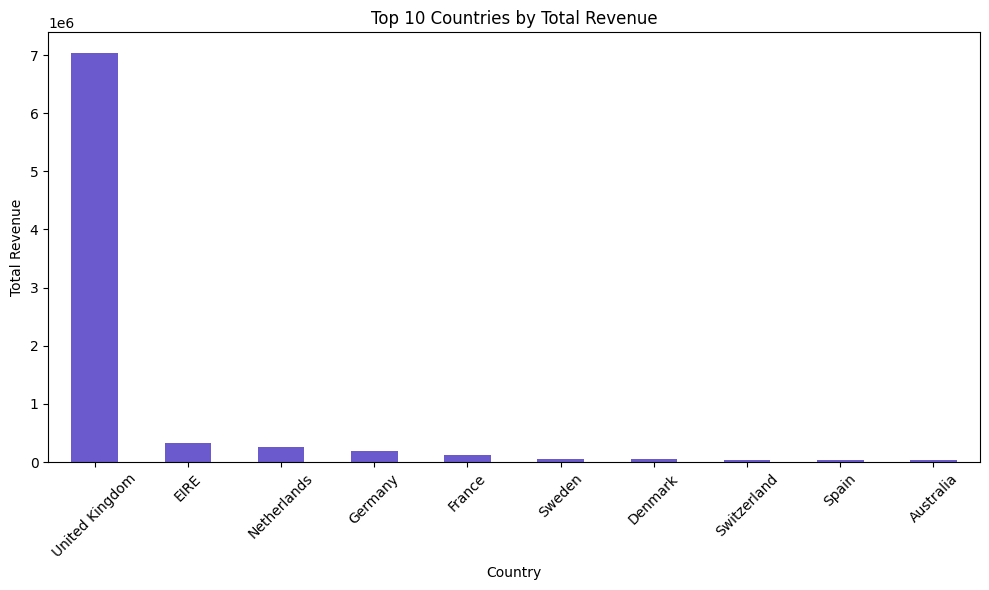

In [62]:
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='slateblue')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
snapshot_date = df['InvoiceDate'].max()
print(snapshot_date)


2010-12-09 20:01:00


In [64]:
df['Customer ID'] = df['Customer ID'].astype(str)

snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

print(rfm.head())


             Recency  Frequency  Monetary
Customer ID                              
12346.0           67         15    -64.68
12347.0            3          2   1323.32
12348.0           74          1    222.16
12349.0           43          4   2646.99
12351.0           11          1    300.93


In [65]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [66]:
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [68]:
def segment_customer(row):
    r, f, m = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])

    if r == 5 and f >= 4 and m >= 4:
        return 'Champion'
    elif r >= 4 and f >= 3:
        return 'Loyal'
    elif r == 5:
        return 'New'
    elif r <= 2 and f >= 4:
        return 'At Risk'
    elif r <= 2:
        return 'Hibernating'
    else:
        return 'Other'

In [69]:
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

In [70]:
print(rfm['Segment'].value_counts())

Segment
Hibernating    1409
Other          1108
Loyal           786
Champion        611
At Risk         329
New             140
Name: count, dtype: int64


• Performed end-to-end data analysis on a real-world e-commerce dataset using Python, Pandas, and Matplotlib.
• Analyzed over 500,000 records to identify sales trends, top-performing products, and geographic revenue distribution.
• Built an RFM model to segment customers into groups like Champions, At-Risk, and Hibernating for targeted marketing.
• Delivered visual insights with bar charts and line plots using Matplotlib to support business decision-making.